In [1]:
import pandas as pd 
import numpy as np
import klib
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.patches as patches

In [2]:
athletes = pd.read_excel('Athletes.xlsx')
coaches = pd.read_excel('Coaches.xlsx')
entriesgender = pd.read_excel('EntriesGender.xlsx')
medals = pd.read_excel('Medals.xlsx')
teams = pd.read_excel('Teams.xlsx')

C:\Users\Intel PC G5900\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
print(athletes.shape)
print(coaches.shape)
print(entriesgender.shape)
print(medals.shape)
print(teams.shape)

(11085, 3)
(394, 4)
(46, 4)
(93, 7)
(743, 4)


In [4]:
teams

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women
...,...,...,...,...
738,South Africa,Water Polo,South Africa,Women
739,Spain,Water Polo,Spain,Men
740,Spain,Water Polo,Spain,Women
741,United States,Water Polo,United States of America,Men


In [5]:
len(coaches['Name'].unique())

381

In [6]:
len(athletes['Name'].unique())

11062

In [7]:
medals_list = ['Gold', 'Silver', 'Bronze', 'Total']
for medal in medals_list:
    print('{}: {}'.format(medal,  medals[medal].sum()))

Gold: 340
Silver: 338
Bronze: 402
Total: 1080


In [8]:
print('Athletes dataset na values:\n', athletes.isna().sum())
print('----------------')
print('Coaches dataset na values:\n',coaches.isna().sum())
print('----------------')
print('Entriesgender dataset na values:\n',entriesgender.isna().sum())
print('----------------')
print('Medals dataset na values:\n',medals.isna().sum())
print('----------------')
print('Teams dataset na values:\n',teams.isna().sum())

Athletes dataset na values:
 Name          0
NOC           0
Discipline    0
dtype: int64
----------------
Coaches dataset na values:
 Name            0
NOC             0
Discipline      0
Event         145
dtype: int64
----------------
Entriesgender dataset na values:
 Discipline    0
Female        0
Male          0
Total         0
dtype: int64
----------------
Medals dataset na values:
 Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64
----------------
Teams dataset na values:
 Name          0
Discipline    0
NOC           0
Event         0
dtype: int64


In [9]:
athletes.head(5)

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


# Athletes dataset analysis

In [10]:
df = athletes.groupby('Discipline')[['NOC']].count().sort_values('NOC', ascending=False).head(10).reset_index()
df

,Discipline,NOC
0,Athletics,2068
1,Swimming,743
2,Football,567
3,Rowing,496
4,Hockey,406
5,Judo,373
6,Handball,343
7,Shooting,342
8,Sailing,336
9,Rugby Sevens,283


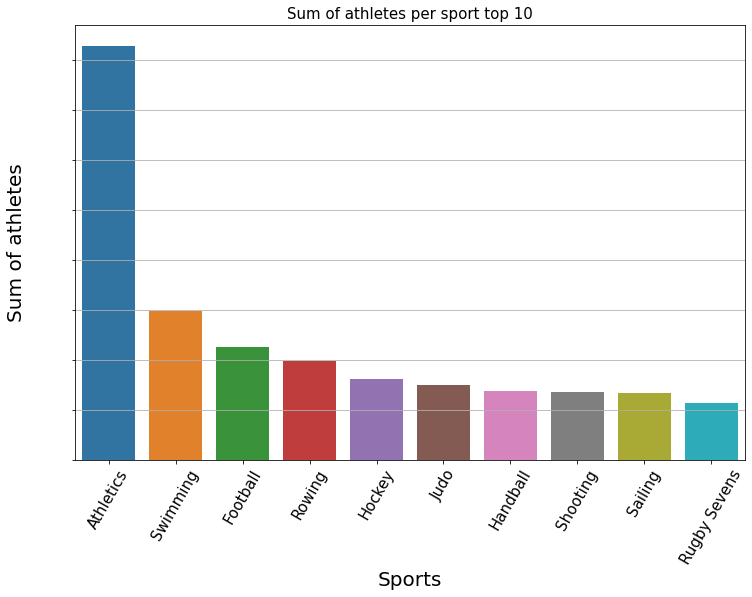

In [11]:
plt.figure(figsize=[12,8])
sns.barplot(x='Discipline', y='NOC', data= df)
plt.xticks(rotation=60, size=15)
plt.xlabel('Sports', size=20)
plt.yticks(color='w',size=15)
plt.ylabel('Sum of athletes', size=20)
plt.grid(axis='y')
plt.title('Sum of athletes per sport top 10', size=15)
plt.show()

In [12]:
df1 = athletes.groupby('NOC')[['Discipline']].count().sort_values('Discipline', ascending=False).head(10).reset_index()
df1

,NOC,Discipline
0,United States of America,615
1,Japan,586
2,Australia,470
3,People's Republic of China,401
4,Germany,400
5,France,377
6,Canada,368
7,Great Britain,366
8,Italy,356
9,Spain,324


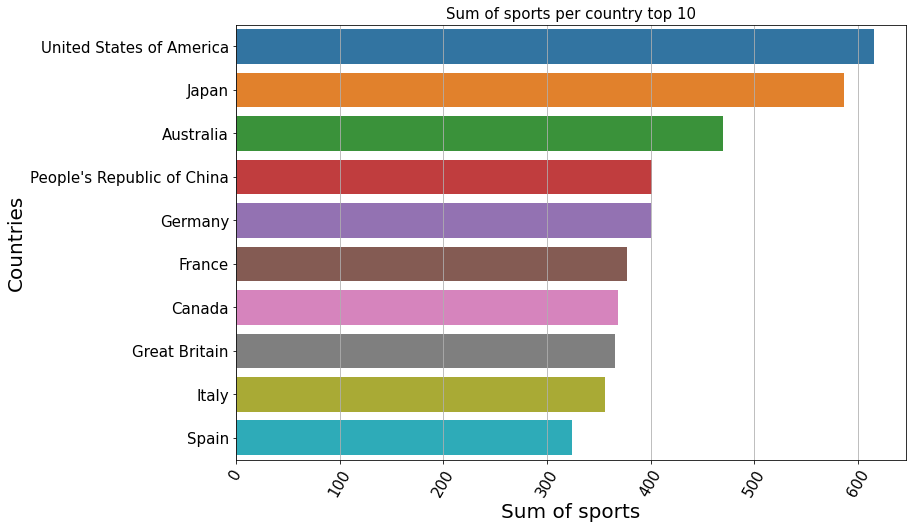

In [13]:
plt.figure(figsize=[12,8])
sns.barplot(y='NOC', x='Discipline', data= df1)
plt.xticks(rotation=60, size=15)
plt.xlabel('Sum of sports', size=20)
plt.yticks(size=15)
plt.ylabel('Countries', size=20)
plt.grid(axis='x')
plt.title('Sum of sports per country top 10', size=15)
plt.show()

# Coaches dataset analysis

In [14]:
coaches.head(5)

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [15]:
coaches.shape

(394, 4)

In [40]:
df = coaches.groupby('Discipline')[['NOC']].count().sort_values('NOC', ascending=False).head(10).reset_index()
df

,Discipline,NOC
0,Basketball,74
1,Artistic Swimming,69
2,Football,59
3,Hockey,45
4,Volleyball,45
5,Handball,29
6,Baseball/Softball,26
7,Rugby Sevens,25
8,Water Polo,22


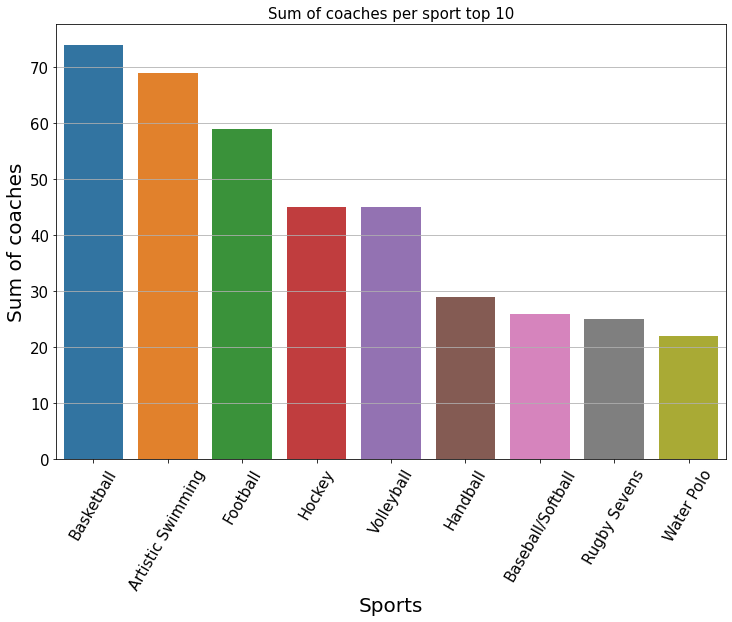

In [41]:
plt.figure(figsize=[12,8])
sns.barplot(x='Discipline', y='NOC', data= df)
plt.xticks(rotation=60, size=15)
plt.xlabel('Sports', size=20)
plt.yticks(size=15)
plt.ylabel('Sum of coaches', size=20)
plt.grid(axis='y')
plt.title('Sum of coaches per sport top 10', size=15)
plt.show()

In [18]:
df1 = coaches.groupby('NOC')[['Discipline']].count().sort_values('Discipline', ascending=False).head(10).reset_index()
df1

,NOC,Discipline
0,Japan,35
1,United States of America,28
2,Spain,28
3,Australia,22
4,Canada,16
5,Italy,14
6,ROC,12
7,Egypt,12
8,South Africa,12
9,People's Republic of China,12


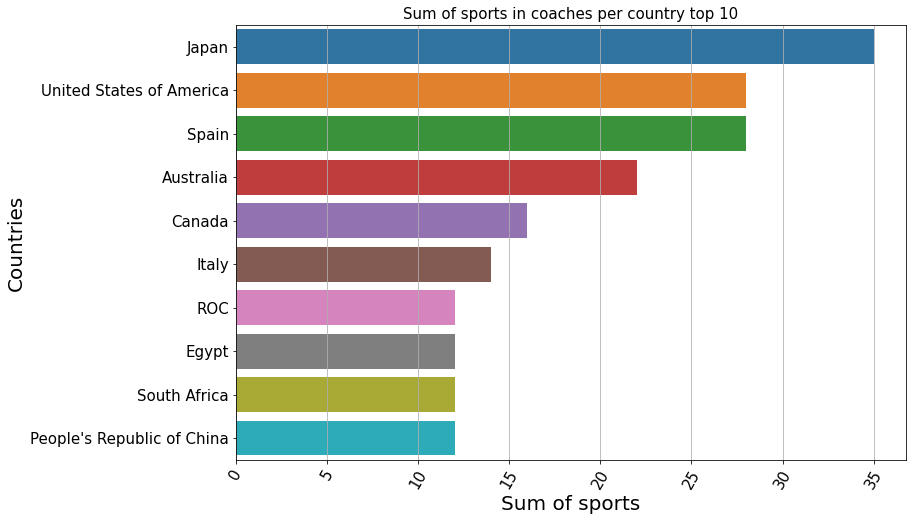

In [19]:
plt.figure(figsize=[12,8])
sns.barplot(y='NOC', x='Discipline', data= df1)
plt.xticks(rotation=60, size=15)
plt.xlabel('Sum of sports', size=20)
plt.yticks(size=15)
plt.ylabel('Countries', size=20)
plt.grid(axis='x')
plt.title('Sum of sports in coaches per country top 10', size=15)
plt.show()

# Genders dataset analysis

In [20]:
entriesgender.head(5)

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


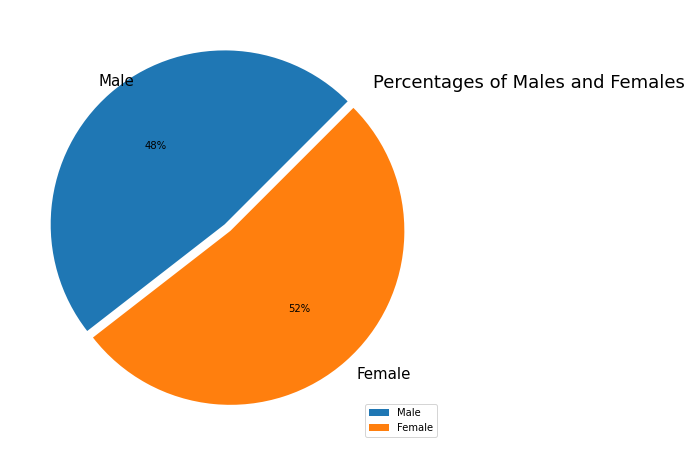

In [45]:
plt.figure(figsize=[10,8])
gender = entriesgender.drop(['Discipline', 'Total'], axis=1).sum()
patches, texts, autotexts = plt.pie(x=gender,
                                    explode = (0, 0.05),
                                    labels=['Male', 'Female'],
                                    center=(10,0),
                                    autopct='%.0f%%',
                                    startangle=45)
for text in texts:
    text.set_color('black')
    text.set_size(15)
plt.title('Percentages of Males and Females', size=18, x=1.2, y=0.8)
plt.legend(loc='lower right')
plt.show()

In [46]:
df = entriesgender.groupby('Discipline')[['Male']].sum().sort_values(['Male'], ascending=False).head(10).reset_index()
df

,Discipline,Male
0,Athletics,1072
1,Swimming,418
2,Football,344
3,Rowing,265
4,Judo,201
5,Wrestling,193
6,Hockey,192
7,Boxing,187
8,Shooting,178
9,Sailing,175


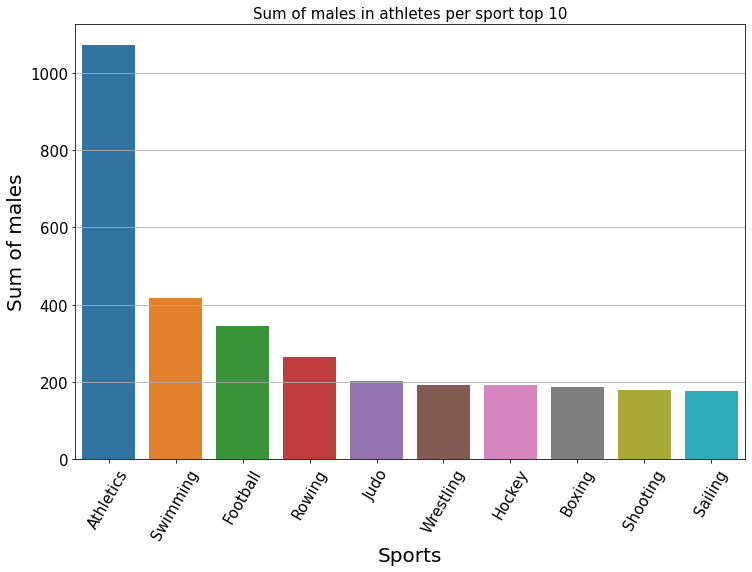

In [52]:
plt.figure(figsize=[12,8])
sns.barplot(x='Discipline', y='Male', data= df)
plt.xticks(rotation=60, size=15)
plt.xlabel('Sports', size=20)
plt.yticks( size=15)
plt.ylabel('Sum of males', size=20)
plt.grid(axis='y')
plt.title('Sum of males in athletes per sport top 10', size=15)
plt.show()

In [53]:
df1 = entriesgender.groupby('Discipline')[['Female']].sum().sort_values(['Female'], ascending=False).head(10).reset_index()
df1

,Discipline,Female
0,Athletics,969
1,Swimming,361
2,Football,264
3,Rowing,257
4,Judo,192
5,Hockey,192
6,Shooting,178
7,Sailing,175
8,Handball,168
9,Rugby Sevens,146


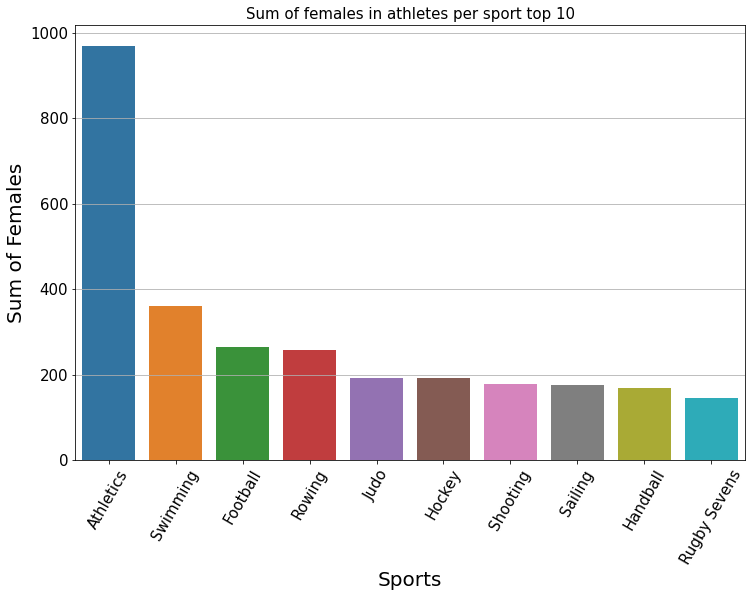

In [54]:
plt.figure(figsize=[12,8])
sns.barplot(x='Discipline', y='Female', data= df1)
plt.xticks(rotation=60, size=15)
plt.xlabel('Sports',size=20)
plt.yticks(size=15)
plt.ylabel('Sum of Females', size=20)
plt.grid(axis='y')
plt.title('Sum of females in athletes per sport top 10', size=15)
plt.show()

In [26]:
df_conc = df.merge(df1, how='outer', on='Discipline')
# df_conc['col'] = (len(df)*(0,) + len(df1)*(1,))
# df_conc.reset_index(inplace=True)
df_conc

,Discipline,Male,Female
0,Athletics,1072.0,969.0
1,Swimming,418.0,361.0
2,Football,344.0,264.0
3,Rowing,265.0,257.0
4,Judo,201.0,192.0
5,Wrestling,193.0,NaN
6,Hockey,192.0,192.0
7,Boxing,187.0,NaN
8,Shooting,178.0,178.0
9,Sailing,175.0,175.0


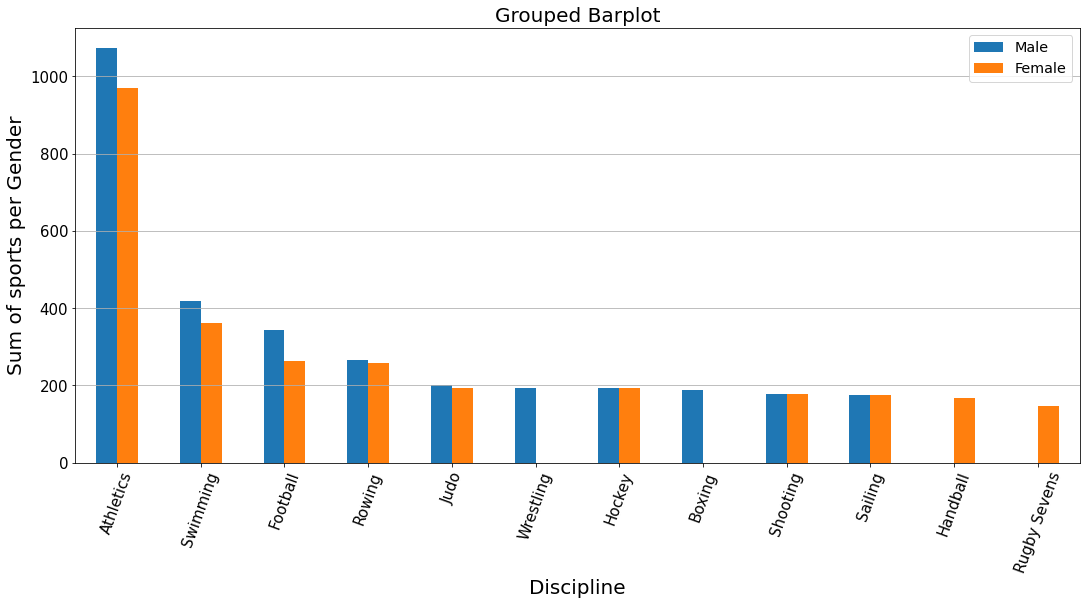

In [27]:
df_conc.plot(x="Discipline",
             y=["Male", "Female"],
             kind="bar",
             figsize=[18,8],)
plt.title('Grouped Barplot', size=20)
plt.xticks(rotation=70, size=15)
plt.xlabel('Discipline',size=20)
plt.yticks( size=15)
plt.grid(axis='y')
plt.ylabel('Sum of sports per Gender', size=20)
plt.legend(fontsize='x-large')
plt.show()

## Medals dataset analysis

In [28]:
medals.head(15)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


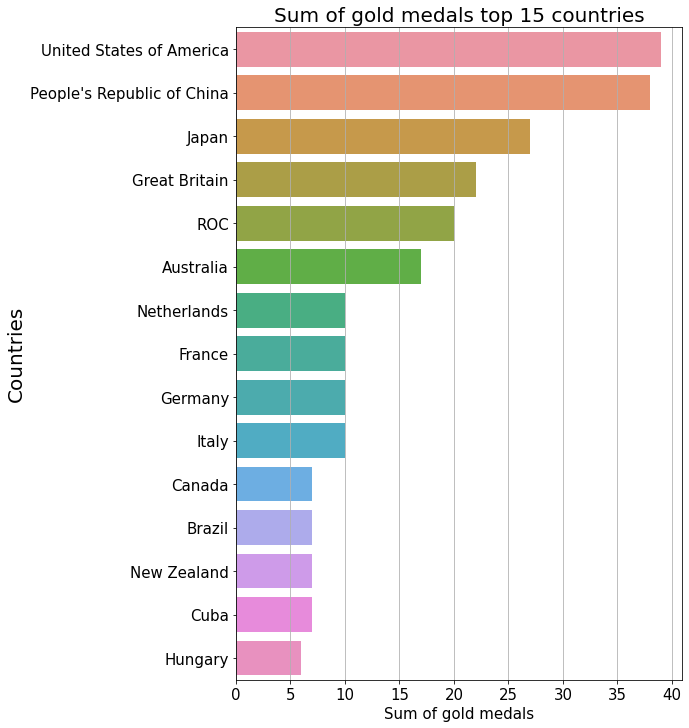

In [56]:
plt.figure(figsize=[8,12])
sns.barplot(data=medals.head(15), y='Team/NOC',x='Gold')
plt.xticks( size=15)
plt.xlabel('Sum of gold medals', size=15)
plt.yticks( size=15)
plt.ylabel('Countries', size=20)
plt.grid(axis='x')
plt.title('Sum of gold medals top 15 countries', size=20)
plt.show()

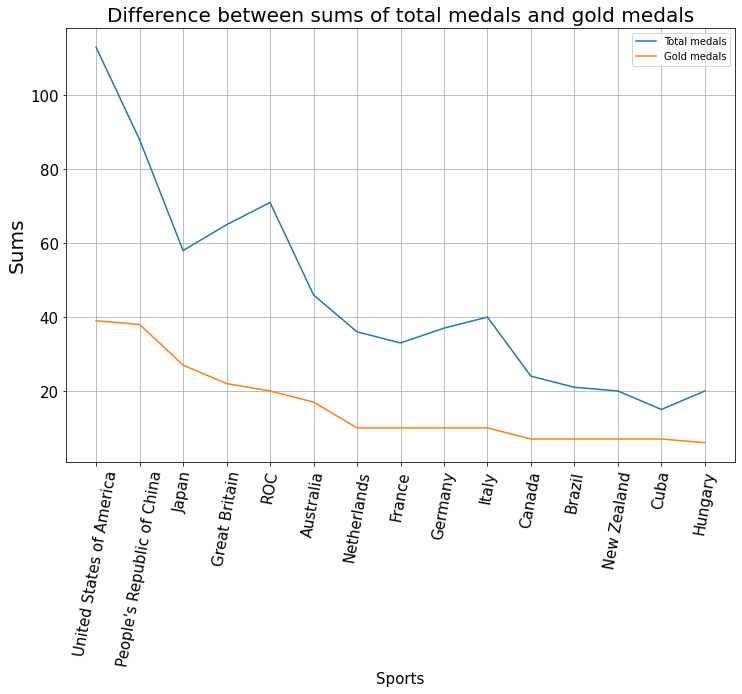

In [30]:
plt.figure(figsize=[12,8])
sns.lineplot(data=medals.head(15), x='Team/NOC',y='Total', label='Total medals')
sns.lineplot(data=medals.head(15), x='Team/NOC',y='Gold', label='Gold medals')
plt.xticks(rotation = 80, size=15)
plt.xlabel('Sports', size=15)
plt.yticks(size=15)
plt.ylabel('Sums', size=20)
plt.grid(axis= 'both')
plt.title('Difference between sums of total medals and gold medals', size=20)
plt.show()

## Teams

In [31]:
teams.head(5)

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [32]:
teams[teams.Name=='Japan']

,Name,Discipline,NOC,Event
5,Japan,3x3 Basketball,Japan,Men
6,Japan,3x3 Basketball,Japan,Women
43,Japan,Archery,Japan,Men's Team
44,Japan,Archery,Japan,Mixed Team
45,Japan,Archery,Japan,Women's Team
81,Japan,Artistic Gymnastics,Japan,Men's Team
82,Japan,Artistic Gymnastics,Japan,Women's Team
111,Japan,Artistic Swimming,Japan,Duet
112,Japan,Artistic Swimming,Japan,Team
174,Japan,Athletics,Japan,Men's 4 x 100m Relay


In [33]:
teams.groupby(['Name', 'Discipline'])[['Event']].count().sort_values('Event', ascending=False).head(10)

,,Event
Name,Discipline,
Japan,Swimming,7
ROC,Swimming,7
United States,Swimming,7
Germany,Swimming,7
Australia,Swimming,7
Great Britain,Swimming,6
Italy,Fencing,6
China,Swimming,6
Brazil,Swimming,6


In [34]:
events = teams.groupby('Event')[['Name']].count().sort_values('Name', ascending=False)[:10].reset_index()

In [35]:
events.loc[10, 'Name'] = teams.groupby('Event')[['Name']].count().sort_values('Name', ascending=False)[11:].sum()[0]

In [36]:
teams.groupby('Event')[['Name']].count().sort_values('Name', ascending=False)[11:].sum()[0]

295

In [37]:
events

,Event,Name
0,Men,120.0
1,Women,114.0
2,Men's Team,40.0
3,Women's Team,40.0
4,Mixed Team,29.0
5,Duet,22.0
6,Mixed Relay,18.0
7,Women's 4 x 200m Freestyle Relay,17.0
8,Women's 4 x 100m Freestyle Relay,16.0
9,Mixed 4 x 100m Medley Relay,16.0


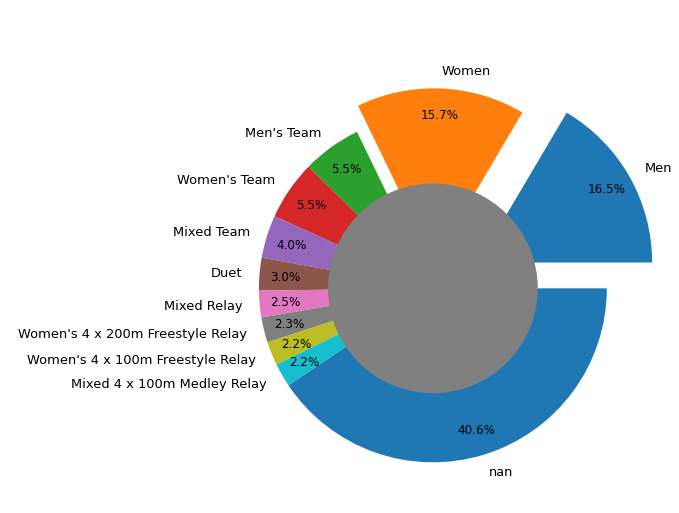

In [38]:
plt.figure(figsize=[12,8])
explode = (0.3, 0.15, 0, 0, 0, 0, 0,0,0,0,0)
patches, texts, autotexts = plt.pie(events.Name,
        explode = explode,
        labels=events.Event,
        autopct='%.1f%%',
        pctdistance=0.85,
        labeldistance=1.1,)

for text in texts:
    text.set_color('black')
    text.set_size(13)
    
for autotext in autotexts:
    autotext.set_color('black') 
    autotext.set_size(12)
    
circle = plt.Circle( (0,0), 0.6, color='grey')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Types of participations per event', color='w',x=-0.1,y=1.1, size=20)
plt.show()